In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster
from sklearn import decomposition

In [2]:
df = pd.read_csv('Live.csv')
df.head()

,status_id,status_type,status_published,num_comments,num_shares,num_reactions,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,512,262,529,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,0,0,150,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,236,57,227,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,0,0,111,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,0,0,213,204,9,0,0,0,0


In [3]:
#eksplorasi data
df.describe()

,num_comments,num_shares,num_reactions,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,224.356028,40.022553,230.117163,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,889.636820,131.599965,462.625309,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,17.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,59.500000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,4.000000,219.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,20990.000000,3424.000000,4710.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [4]:
#eksplorasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
status_id           7050 non-null object
status_type         7050 non-null object
status_published    7050 non-null object
num_comments        7050 non-null int64
num_shares          7050 non-null int64
num_reactions       7050 non-null int64
num_likes           7050 non-null int64
num_loves           7050 non-null int64
num_wows            7050 non-null int64
num_hahas           7050 non-null int64
num_sads            7050 non-null int64
num_angrys          7050 non-null int64
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [5]:
#missing data
df.isnull().sum()

status_id           0
status_type         0
status_published    0
num_comments        0
num_shares          0
num_reactions       0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [6]:
#menghilangkan atau membuang data yang tidak berpengaruh
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [7]:
df.head()

,status_type,num_comments,num_shares,num_reactions,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,512,262,529,432,92,3,1,1,0
1,photo,0,0,150,150,0,0,0,0,0
2,video,236,57,227,204,21,1,1,0,0
3,photo,0,0,111,111,0,0,0,0,0
4,photo,0,0,213,204,9,0,0,0,0


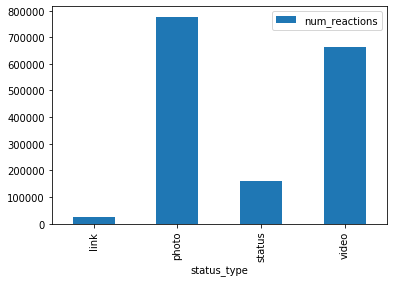

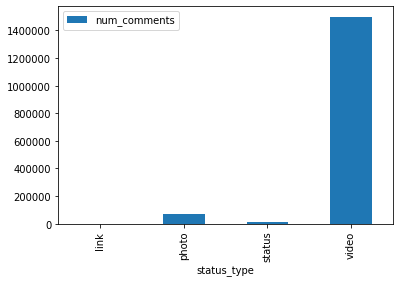

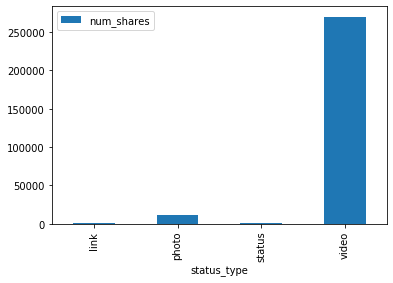

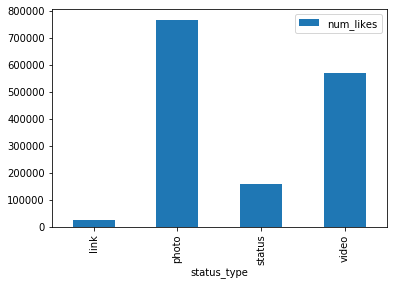

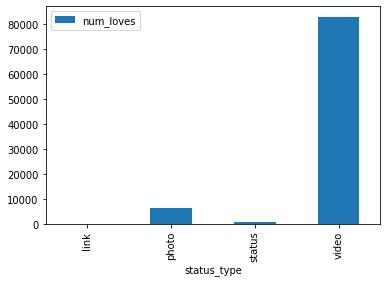

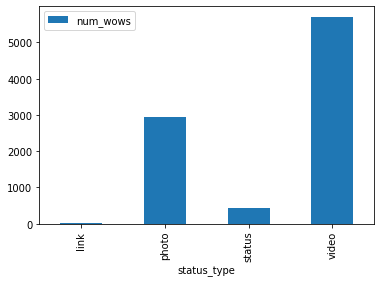

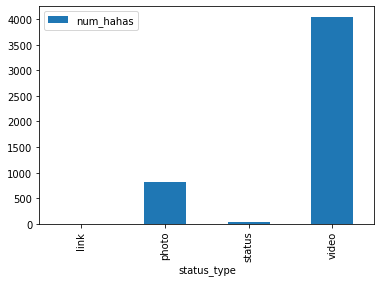

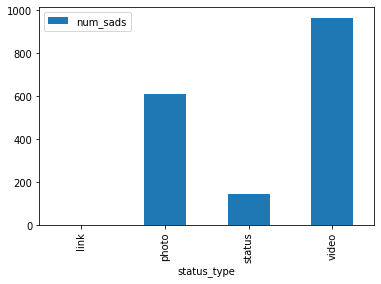

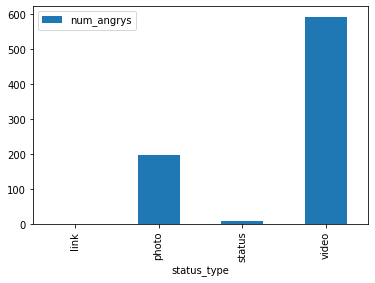

In [8]:
#eksplorasi data
#barplot
df.groupby('status_type').sum().plot(kind='bar', y='num_reactions')
df.groupby('status_type').sum().plot(kind='bar', y='num_comments')
df.groupby('status_type').sum().plot(kind='bar', y='num_shares')
df.groupby('status_type').sum().plot(kind='bar', y='num_likes')
df.groupby('status_type').sum().plot(kind='bar', y='num_loves')
df.groupby('status_type').sum().plot(kind='bar', y='num_wows')
df.groupby('status_type').sum().plot(kind='bar', y='num_hahas')
df.groupby('status_type').sum().plot(kind='bar', y='num_sads')
df.groupby('status_type').sum().plot(kind='bar', y='num_angrys')

In [9]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [10]:
df

,status_type,num_comments,num_shares,num_reactions,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,512,262,529,432,92,3,1,1,0
1,photo,0,0,150,150,0,0,0,0,0
2,video,236,57,227,204,21,1,1,0,0
3,photo,0,0,111,111,0,0,0,0,0
4,photo,0,0,213,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,0,0,89,89,0,0,0,0,0
7046,photo,0,0,16,14,1,0,1,0,0
7047,photo,0,0,2,1,1,0,0,0,0
7048,photo,12,22,351,349,2,0,0,0,0


In [11]:
#visualisasi Data
reac = df["num_reactions"]

In [12]:
reac.head()

0    529
1    150
2    227
3    111
4    213
Name: num_reactions, dtype: int64

In [13]:
like = df["num_likes"]

Text(0.5, 1.0, 'REACTION VS LIKES')

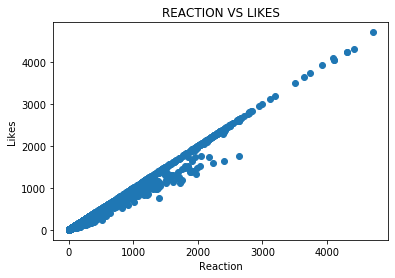

In [14]:
plt.scatter(reac,like, label = 'True Position')
plt.xlabel("Reaction")
plt.ylabel("Likes")
plt.title("REACTION VS LIKES")

In [15]:
com = df["num_comments"]
love = df["num_loves"]

Text(0.5, 1.0, 'COMMENTS VS LOVES')

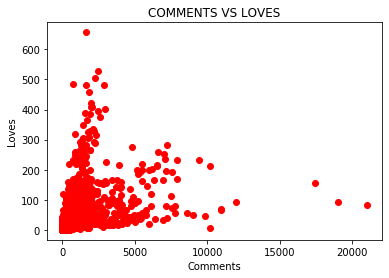

In [16]:
plt.scatter(com,love, label = 'True Position', color='r')
plt.xlabel("Comments")
plt.ylabel("Loves")
plt.title("COMMENTS VS LOVES")

<function matplotlib.pyplot.show(*args, **kw)>

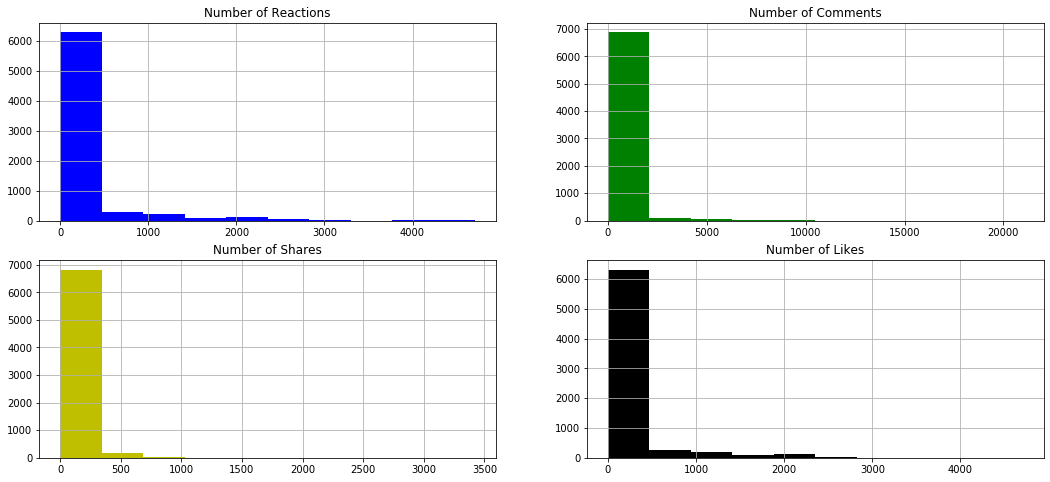

In [17]:
f,ax=plt.subplots(2,2,figsize=(8,8))

ax[0,0].set_title('Number of Reactions')
df['num_reactions'].hist(figsize=(18,8),color='b', ax=ax[0,0])
pd.DataFrame.skew(df['num_reactions'])

ax[0,1].set_title('Number of Comments')
df['num_comments'].hist(figsize=(18,8),color='g', ax=ax[0,1])
pd.DataFrame.skew(df['num_comments'])

ax[1,0].set_title('Number of Shares')
df['num_shares'].hist(figsize=(18,8),color='y', ax=ax[1,0])
pd.DataFrame.skew(df['num_shares'])

ax[1,1].set_title('Number of Likes')
df['num_likes'].hist(figsize=(18,8),color='black', ax=ax[1,1])
pd.DataFrame.skew(df['num_likes'])

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

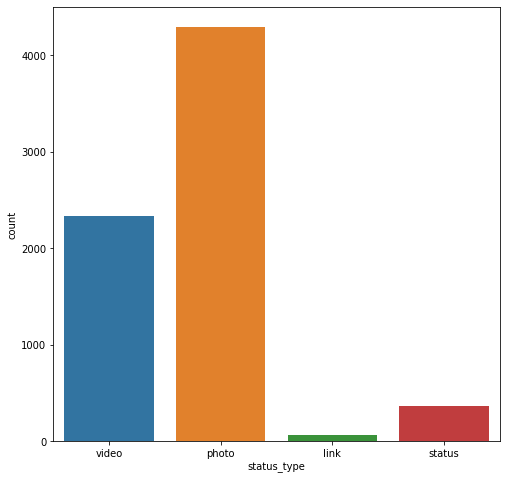

In [18]:
import seaborn as sns
f,ax=plt.subplots(1,figsize=(8,8))
sns.countplot('status_type',data=df)
plt.show

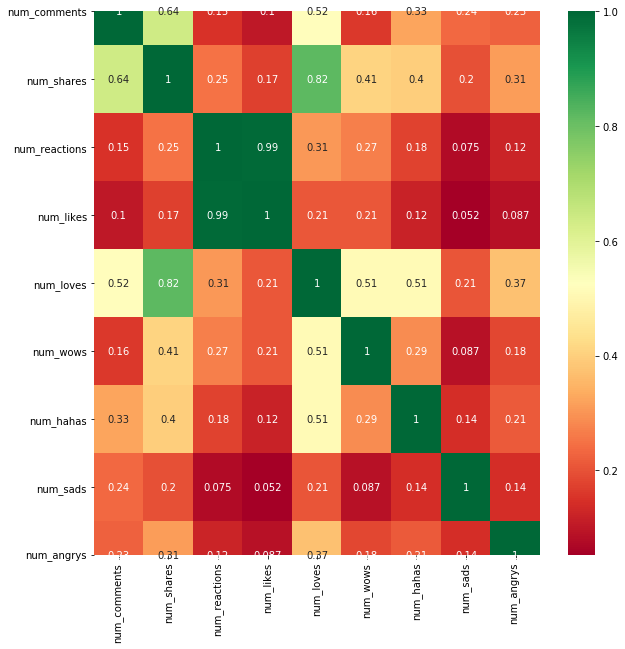

In [19]:
# Correlation Matrix with Heatmap

import pandas as pd
import numpy as np
import seaborn as sns

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn", linecolor = 'black')

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.03515297 0.05940744 0.02126997 0.0211833  0.10332988 0.01682465
 0.03505194 0.01331245 0.69446739]


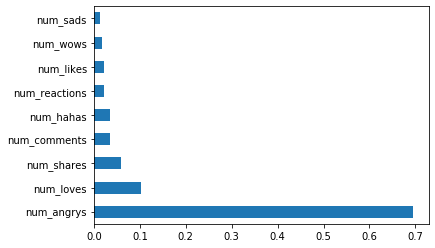

In [20]:
#Feature Selection

import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

X= df.iloc[:,1:12]
y = df.iloc[:,-1]
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')

plt.show()

In [21]:
#Hierarchical clustering
%matplotlib inline 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [28]:
X = np.array(df)

In [26]:
df.drop(['status_type'], axis=1, inplace=True)

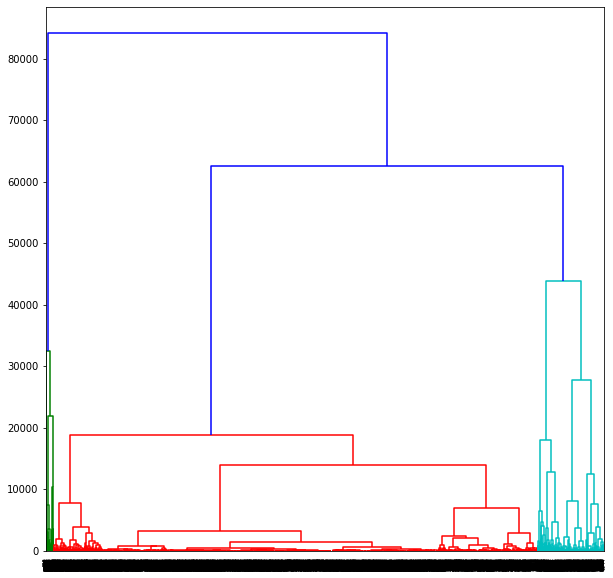

In [29]:
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [30]:
# Melakukan fitting hierarchical clustering 
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_


In [31]:
labels

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_score(X, labels, metric='euclidean')

0.7728752135851344

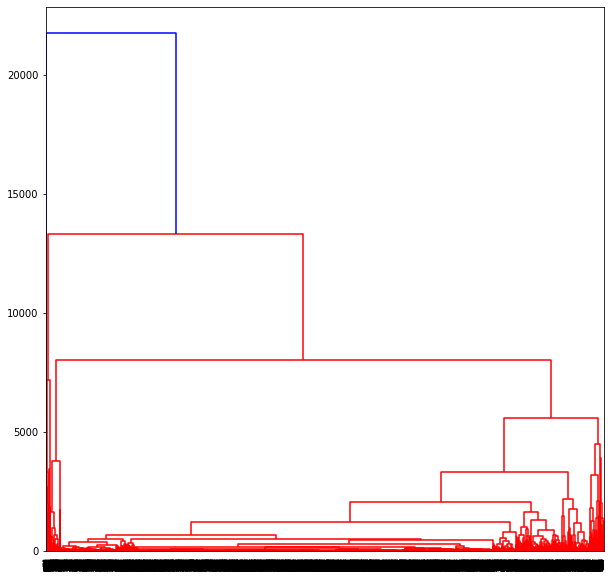

In [46]:
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

In [47]:
# Melakukan fitting hierarchical clustering 
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
model.fit(X)
labels = model.labels_

In [48]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
silhouette_score(X, labels, metric='euclidean')

0.8910002643150313

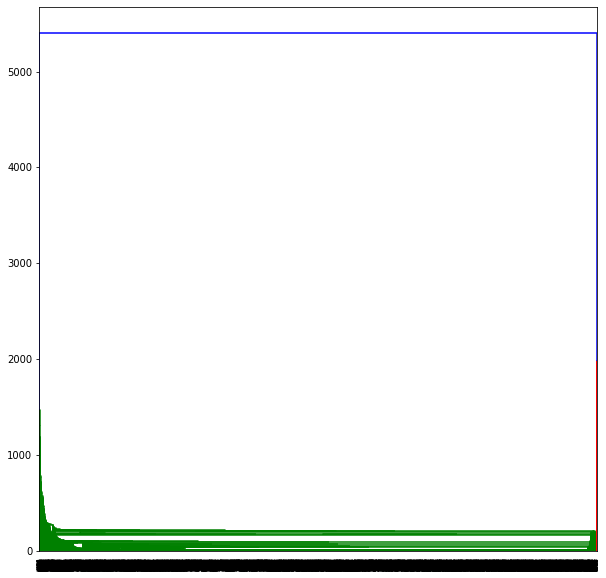

In [38]:
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))

In [39]:
# Melakukan fitting hierarchical clustering 
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
model.fit(X)
labels = model.labels_

In [40]:
labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_score(X, labels, metric='euclidean')

0.9541327829005506

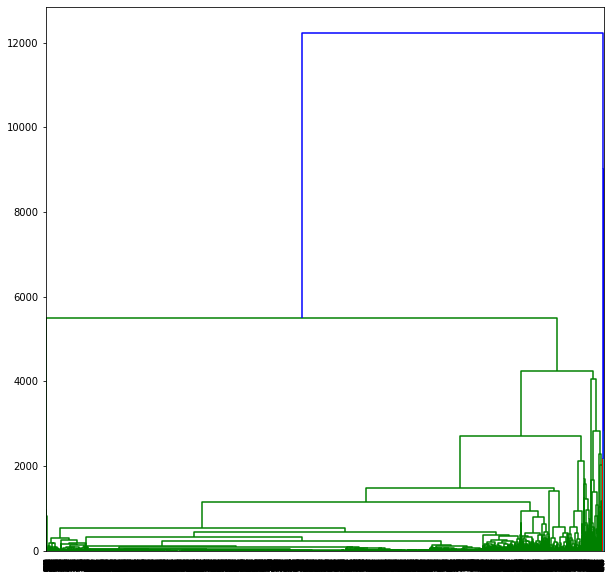

In [42]:
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))

In [43]:
# Melakukan fitting hierarchical clustering 
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
model.fit(X)
labels = model.labels_

In [44]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_score(X, labels, metric='euclidean')

0.9173663458907084

In [50]:
#K-Means Clustering
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [51]:
X = np.array(df)

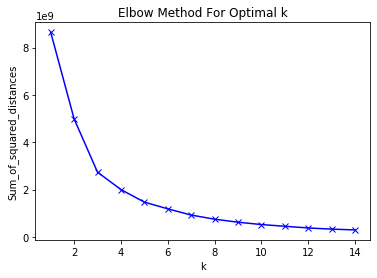

In [52]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#fungsi dari SSE merupakan penjumlahan nilai kuadrat dari jarak data dengan pusat Cluster

In [53]:
# Melakukan aktivasi algoritma K-Means 
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
#menampilkan pusat cluster
print(kmeans.cluster_centers_)

[[7.92453755e+01 2.00053755e+01 1.10468300e+02 1.01999684e+02
  7.28205534e+00 5.76442688e-01 3.66482213e-01 1.69802372e-01
  7.08300395e-02]
 [8.48665000e+03 6.15100000e+02 6.78450000e+02 5.29950000e+02
  1.28500000e+02 6.40000000e+00 8.45000000e+00 3.72500000e+00
  1.42500000e+00]
 [2.26566449e+02 7.82962963e+01 1.72302832e+03 1.67882135e+03
  3.43507625e+01 7.40740741e+00 1.85620915e+00 3.07189542e-01
  2.85403050e-01]
 [2.81868584e+03 4.20721239e+02 4.67283186e+02 3.50128319e+02
  1.00756637e+02 7.91150442e+00 6.20353982e+00 1.56637168e+00
  7.16814159e-01]]


In [55]:
print(kmeans.labels_)

[0 0 0 ... 0 0 0]


In [56]:
silhouette_samples(X, kmeans.labels_, metric='euclidean')

array([0.57709624, 0.89520206, 0.83546027, ..., 0.91870653, 0.78411458,
       0.9233251 ])

In [57]:
silhouette_score(X, kmeans.labels_, metric='euclidean')

0.8175643887619709